In [17]:
#Actividad 5:Uso de software para búsqueda. Mauricio Sifuentes Rincón 2007693 Hora clase N4
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np


In [12]:
#Cargar datos
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data = train_data / 255.0
test_data = test_data / 255.0
#Preprocesamiento de datos
train_data = train_data.reshape((train_data.shape[0], 28 * 28))
test_data = test_data.reshape((test_data.shape[0], 28 * 28))

In [13]:
#Selección del modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#Entrenamiento del modelo
model.fit(train_data, train_labels, epochs=5, batch_size=32)
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Exactitud del modelo en datos de prueba: {test_accuracy}')

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2414 - accuracy: 0.9282
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0990 - accuracy: 0.9695
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0693 - accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0516 - accuracy: 0.9841
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9768
Exactitud del modelo en datos de prueba: 0.9768000245094299


In [15]:
#Predicciones
predictions = model.predict(test_data[:5])
for i in range(5):
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = test_labels[i]
    print(f'Predicción: {predicted_label}, Valor Real: {true_label}')
    predictions = model.predict(test_data)

1/1 [==============================] - 0s 63ms/step
Predicción: 7, Valor Real: 7
313/313 [==============================] - 1s 2ms/step
Predicción: 2, Valor Real: 2
313/313 [==============================] - 1s 2ms/step
Predicción: 1, Valor Real: 1
313/313 [==============================] - 1s 2ms/step
Predicción: 0, Valor Real: 0
313/313 [==============================] - 1s 2ms/step
Predicción: 4, Valor Real: 4
313/313 [==============================] - 1s 2ms/step


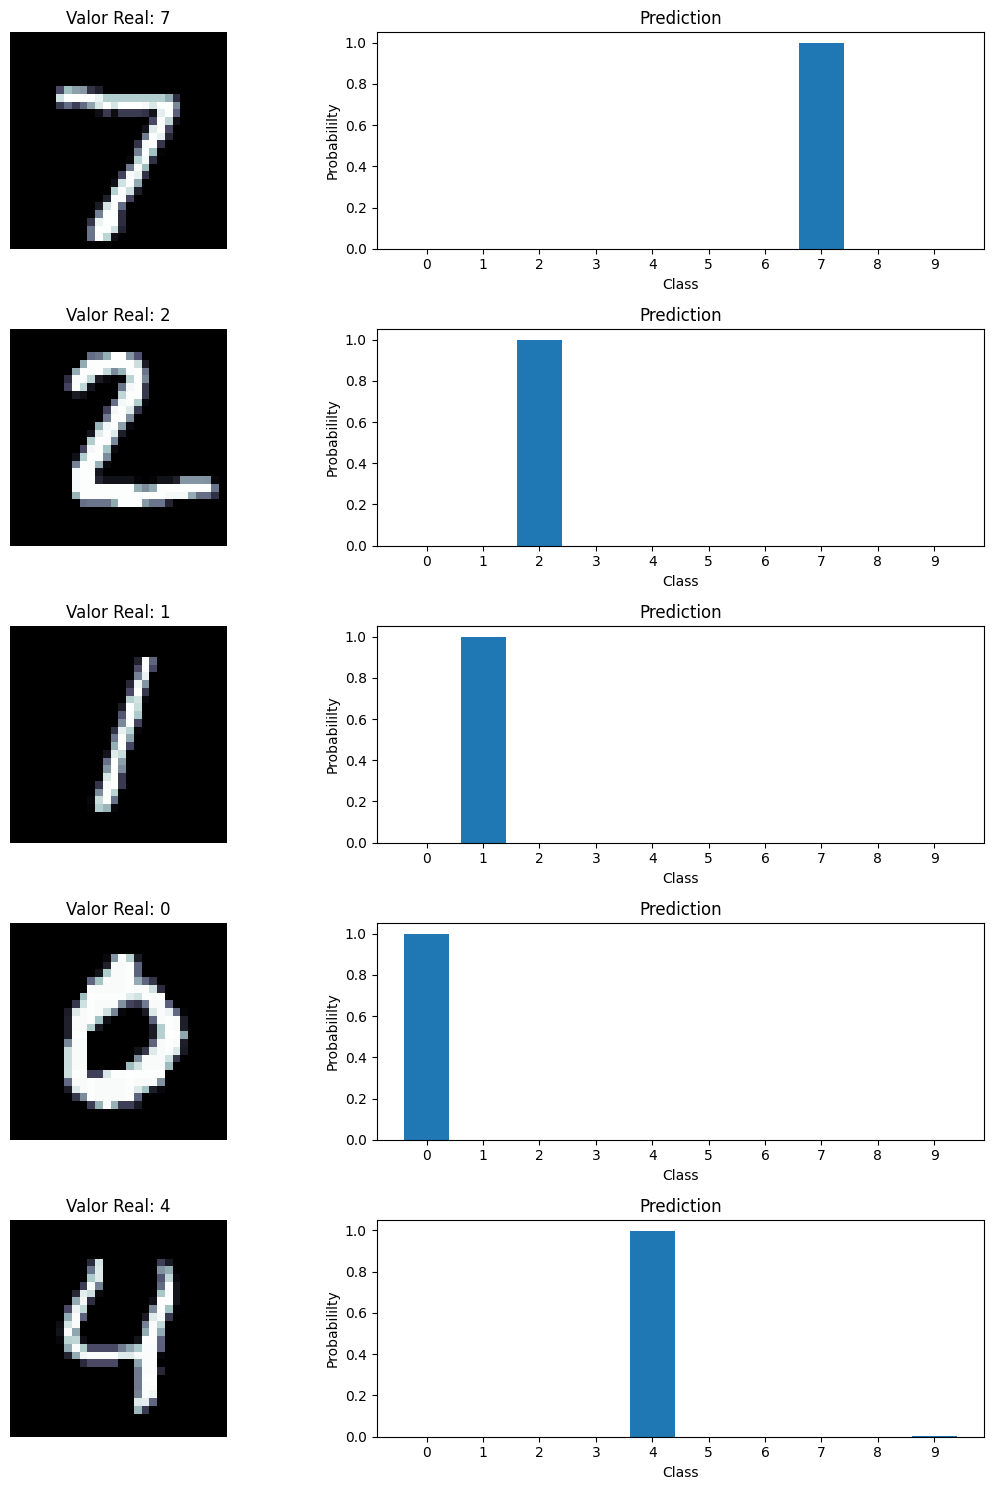

In [16]:
#Prueba de modelo
num_samples = 5
plt.figure(figsize=(12, 15))
for i in range(num_samples):
    plt.subplot(num_samples, 2, 2*i+1)
    plt.imshow(test_data[i].reshape(28, 28), cmap='bone')
    plt.title(f'Valor Real: {test_labels[i]}')
    plt.axis('off')

    plt.subplot(num_samples, 2, 2*i+2)
    plt.bar(np.arange(10), predictions[i], tick_label=np.arange(10))
    plt.title('Prediction')
    plt.xlabel('Class')
    plt.ylabel('Probabililty')

plt.tight_layout()
plt.show()